### Pandas Basics for Data Analysis
The name pandas comes from **pan**el **da**ta. If you've worked in excel before, this way of organizing data should look familiar to you.
  
Pandas has two main data structures; a **dataframe** and a **series**. A dataframe is merely a container of series strung together. Thus, each column in a dataframe is a series with its own set of methods. Both dataframes and series have an **index**, which can be either numbers or strings and which cannot contain duplicates, because it is supposed to refer to a unique row or observation in the data.

Pandas is a huge library with a lot of functionality - it's always a good idea to keep the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) near by for reference.
  
It is good practice to keep our data **tidy** - each row would be an observation, each column a variable, and at the intersection of each, a value.
![tidy data](https://r4ds.had.co.nz/images/tidy-1.png)

In [2]:
# Import Python Libraries

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [3]:
# Read csv file

# df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")
df = pd.read_csv('http://rcs.bu.edu/examples/python/DataAnalysis/Salaries.csv')

In [4]:
# List first 5 records

df.head(n=5)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [5]:
# List the last 5 records

df.tail()

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [6]:
# Inspect the key features

print('Data Types:')
display(df.dtypes)

print('\n') #\n creates a new line
print('Columns:')
display(df.columns)

print('\nShape:') #\n can be put directly in the string
display(df.shape)

Data Types:


rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object



Columns:


Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')


Shape:


(78, 6)

In [7]:
# Summarize the data

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [8]:
# Calculate the mean of numeric columns

df.mean(numeric_only=True)

phd            19.705128
service        15.051282
salary     108023.782051
dtype: float64

In [9]:
# Examine the Salary column

df['salary']

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [10]:
# Select the Salary column a different way

df.salary

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [11]:
# Group data using rank

df.groupby('rank')

In [12]:
# Calculate mean value for each numeric column per each group

df.groupby('rank').mean(numeric_only=True)

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [13]:
# Calculate mean salary for each professor rank

df.groupby('rank')[['salary']].mean()

,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


In [14]:
# Create a boolean index

df['salary'] < 70000

0     False
1     False
2     False
3     False
4     False
      ...  
73    False
74    False
75    False
76    False
77    False
Name: salary, Length: 78, dtype: bool

In [15]:
# How many people satisfy the criteria?

idx = (df['salary'] < 70000)
idx.sum() # True=1, False=0

3

In [16]:
# Filter using a boolean index

df[df['salary'] < 70000]

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
54,AssocProf,A,25,22,Female,62884
66,AsstProf,A,7,6,Female,63100


In [17]:
# Select only those rows that contain female professors

df_f = df[ df['sex'] == 'Female' ]
print(df_f.shape)
display(df_f.head())

(39, 6)


,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


In [18]:
# Select columns rank and salary:
X = df[['rank','salary']]
X

,rank,salary
0,Prof,186960
1,Prof,93000
2,Prof,110515
3,Prof,131205
4,Prof,104800
...,...,...
73,Prof,105450
74,AssocProf,104542
75,Prof,124312
76,Prof,109954


In [19]:
# Select rows by their position

df[10:20]

,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


In [20]:
# Select rows by their labels

X = df.loc[1:10,['salary','phd','rank']]
X

,salary,phd,rank
1,93000,12,Prof
2,110515,23,Prof
3,131205,40,Prof
4,104800,20,Prof
5,122400,20,Prof
6,81285,20,AssocProf
7,126300,18,Prof
8,94350,29,Prof
9,57800,51,Prof
10,128250,39,Prof


In [21]:
# Select a range of rows and/or columns, using their positions
X = df.iloc[:,[0, 3]]
X

,rank,service
0,Prof,49
1,Prof,6
2,Prof,20
3,Prof,31
4,Prof,18
...,...,...
73,Prof,10
74,AssocProf,6
75,Prof,17
76,Prof,14


In [22]:
# Indexing

df.iloc[0]  # First row of a data frame
df.iloc[-1] # Last row

i = 5
df.iloc[i]  #(i+1)th row

df.iloc[:, 0]  # First column
df.iloc[:, -1] # Last column

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [23]:
# Indexing continued

df.iloc[0:7]       # First 7 rows
df.iloc[:, 0:2]    # First 2 columns
df.iloc[1:3, 0:2]  # Second through third rows and first 2 columns
df.iloc[[0,5], [1,3]]  # 1st and 6th rows and 2nd and 4th columns

,discipline,service
0,B,49
5,A,20


In [24]:
# Create a new data frame from the original sorted by the column Salary

df_sorted = df.sort_values(by='salary')
df_sorted.head()

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
54,AssocProf,A,25,22,Female,62884
66,AsstProf,A,7,6,Female,63100
71,AssocProf,B,12,9,Female,71065
57,AsstProf,A,3,1,Female,72500


In [25]:
# Sort the data using 2 or more columns:

df_sorted = df.sort_values(by=['service', 'salary'], ascending=[True, False])
df_sorted.head(20)

,rank,discipline,phd,service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


In [26]:
# Save the data

df.to_csv('mydata.csv')

## Adding new columns to our data

In [28]:
# Read csv file

df = pd.read_csv("https://cand3workshopbucket.s3.amazonaws.com/geo.csv")
df.head()

,name,region,oecd,g77,lat,long,income2017
0,Afghanistan,asia,False,True,33.00000,66.00000,low
1,Albania,europe,False,False,41.00000,20.00000,upper_mid
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid
3,Andorra,europe,False,False,42.50779,1.52109,high
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid


Below we can create new columns based on the values in other columns.

In [30]:
df['new'] = df['lat'] + df['long'] + 1
df.head()

,name,region,oecd,g77,lat,long,income2017,new
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000


In [31]:
df['southern_oecd'] = (df.lat<0) & (df.oecd==True)
df.head(10)

,name,region,oecd,g77,lat,long,income2017,new,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False
5,Antigua and Barbuda,americas,False,True,17.05000,-61.80000,high,-43.75000,False
6,Argentina,americas,False,True,-34.00000,-64.00000,upper_mid,-97.00000,False
7,Armenia,europe,False,False,40.25000,45.00000,lower_mid,86.25000,False
8,Australia,asia,True,False,-25.00000,135.00000,high,111.00000,True
9,Austria,europe,True,False,47.33333,13.33333,high,61.66666,False


### Renaming

In [33]:
df.rename(columns={'lat':'latitude'}, inplace=True)

In [34]:
df.head()

,name,region,oecd,g77,latitude,long,income2017,new,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False


✮ The `inplace` parameter will show up often in pandas method definitions. It is used when pandas will by default return a *new* dataframe that has been created from your operation. You can use `inplace=True` to assign that new dataframe back to the original variable.

## Joining and Merging
There are [several ways](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to join together data in pandas. Merging is distinct from joining is distinct from concatenating. Merging is "column-on-column" and joinging is "index-on-index," while concatenation is simply joining dataframes end-to-end.   

### "Key" concept
Remember that a dataframe has an index, which is a sequence of values. Each observation in the data has value in the index. When joining and merging, the index often serves as the **key** used to join two dataframes together.

### Joining
Let's start by looking at basic **join** using an example from the pandas documentation.

In [37]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                       'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [38]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [39]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [40]:
left.join(right, how ='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


Notice that there is no `K3` observation in the resulting dataframe, nor is there a `C` or `D` value  for `K1`. This is because the default `join` is a left one. Panda's join allows for four types of joins, inner, outter, left, and right. In the case of a left join, all observations in the left table are kept. Information regarding them from the right table is kept, while observations unique to the right table are discarded. This classic illustration should provide some intuition on the four types of joins.  
![joins](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)  
**➤ Try changing the `how` parameter below to see different joins.**

In [42]:
left.join(right, how ='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [43]:
display(left)
display(right)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


### Merging
The `merge()` method in pandas brings a lot more functionality to the basic join. One of the perks of using this method is a finer control over which columns will serve as the keys - or, using the intersection of columns (the columns that both dataframes share). Let's reuse our `left` and `right` dataframes with a slight modification.

In [45]:
left['E'] = ['E0', 'E1', 'E2']
right['E'] = ['E0', 'E1', 'E2']

left.merge(right)

,A,B,E,C,D
0,A0,B0,E0,C0,D0
1,A1,B1,E1,C2,D2
2,A2,B2,E2,C3,D3


Merge performed a left join again, but instead of using the index as a key, it defaulted to using the column that they had in common, `E`.


### Appending
We can also append a single row to the bottom.

In [48]:
my_coords = (51.88999644,1.476164762)
my_country = pd.Series({'name':'Sealand','region':'europe','oecd':False,'g77':False,
                        'latitude':my_coords[0], 'long':my_coords[1],'income2017':'low',
                        'new':my_coords[0]+my_coords[1],'southern_oecd':False})
display(my_country)

name               Sealand
region              europe
oecd                 False
g77                  False
latitude         51.889996
long              1.476165
income2017             low
new              53.366161
southern_oecd        False
dtype: object

In [49]:
# Convert it into a single row of a dataframe
my_country = pd.DataFrame(my_country).transpose()
display(my_country)

,name,region,oecd,g77,latitude,long,income2017,new,southern_oecd
0,Sealand,europe,False,False,51.889996,1.476165,low,53.366161,False


In [50]:
# Append it to the data
new_df = pd.concat([df,my_country])
display(new_df)

,name,region,oecd,g77,latitude,long,income2017,new,southern_oecd
0,Afghanistan,asia,False,True,33.0,66.0,low,100.0,False
1,Albania,europe,False,False,41.0,20.0,upper_mid,62.0,False
2,Algeria,africa,False,True,28.0,3.0,upper_mid,32.0,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.5,18.5,lower_mid,7.0,False
...,...,...,...,...,...,...,...,...,...
192,Yemen,asia,False,True,15.5,47.5,lower_mid,64.0,False
193,Zambia,africa,False,True,-14.33333,28.5,lower_mid,15.16667,False
194,Zimbabwe,africa,False,True,-19.0,29.75,low,11.75,False
195,South Sudan,africa,False,True,7.5,30.0,low,38.5,False


In [51]:
# Fix the index
new_df = new_df.reset_index(drop=True) #Drop determines whether to keep the old index as a column
display(new_df)

,name,region,oecd,g77,latitude,long,income2017,new,southern_oecd
0,Afghanistan,asia,False,True,33.0,66.0,low,100.0,False
1,Albania,europe,False,False,41.0,20.0,upper_mid,62.0,False
2,Algeria,africa,False,True,28.0,3.0,upper_mid,32.0,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.5,18.5,lower_mid,7.0,False
...,...,...,...,...,...,...,...,...,...
192,Yemen,asia,False,True,15.5,47.5,lower_mid,64.0,False
193,Zambia,africa,False,True,-14.33333,28.5,lower_mid,15.16667,False
194,Zimbabwe,africa,False,True,-19.0,29.75,low,11.75,False
195,South Sudan,africa,False,True,7.5,30.0,low,38.5,False


## Plotting
`Matplotlib` is a legacy package for plotting, and is the package which pandas' plotting functionality (as well as most other python libraries) is built upon.

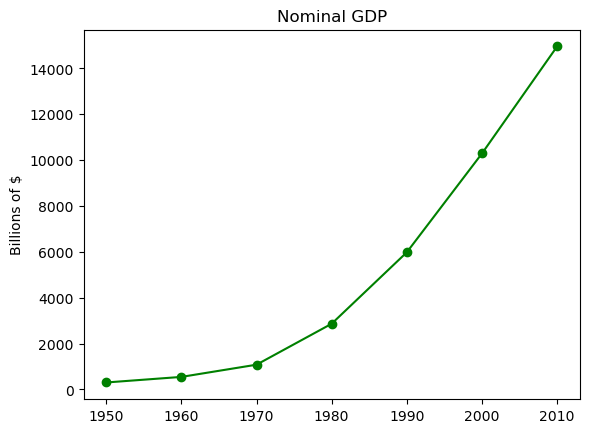

In [53]:
from matplotlib import pyplot as plt

# Get some data
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]

# Create a line chart, years on x-axis, gdp on y-axis
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')

# Add a title
plt.title("Nominal GDP")

# Add a label to the y-axis
plt.ylabel("Billions of $")

plt.show() # code to print out final chart

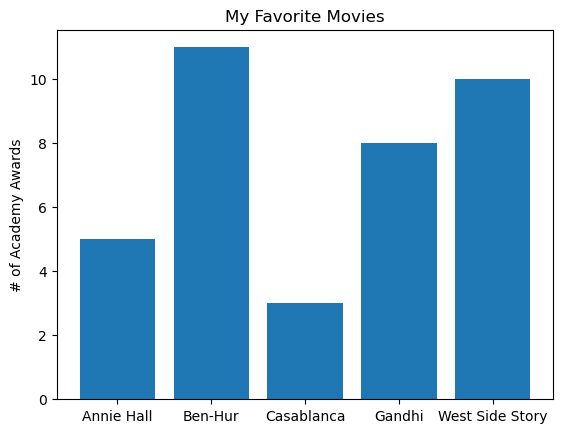

In [54]:
# Bar chart example #1

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar(movies,num_oscars)

plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

plt.show()

Text(0, 0.5, 'Count')

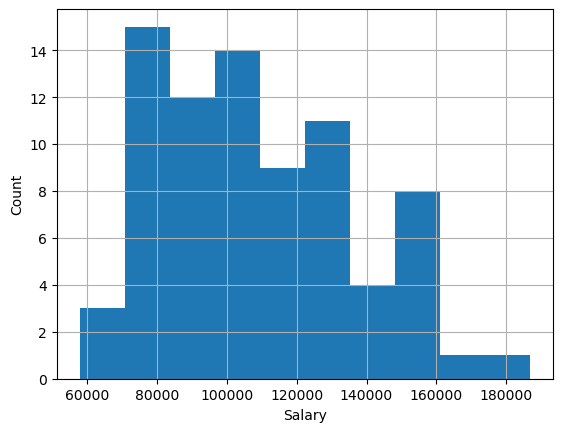

In [55]:
# Histograms
# Create a histogram using pandas dataframe column.
df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")
df['salary'].hist()
plt.xlabel('Salary')
plt.ylabel('Count')

Text(0, 0.5, 'Years since PhD')

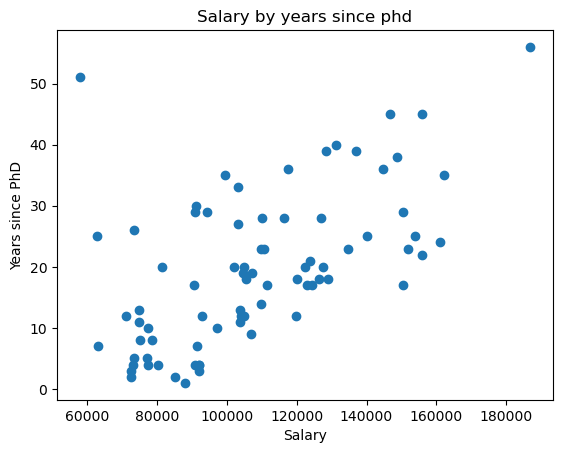

In [56]:
# Scatterplots

plt.scatter(df['salary'], df['phd'])
plt.title("Salary by years since phd")
plt.xlabel("Salary")
plt.ylabel("Years since PhD")

# You can extend the visual power of matplot lib quickly by using Seaborn

https://seaborn.pydata.org/tutorial.html

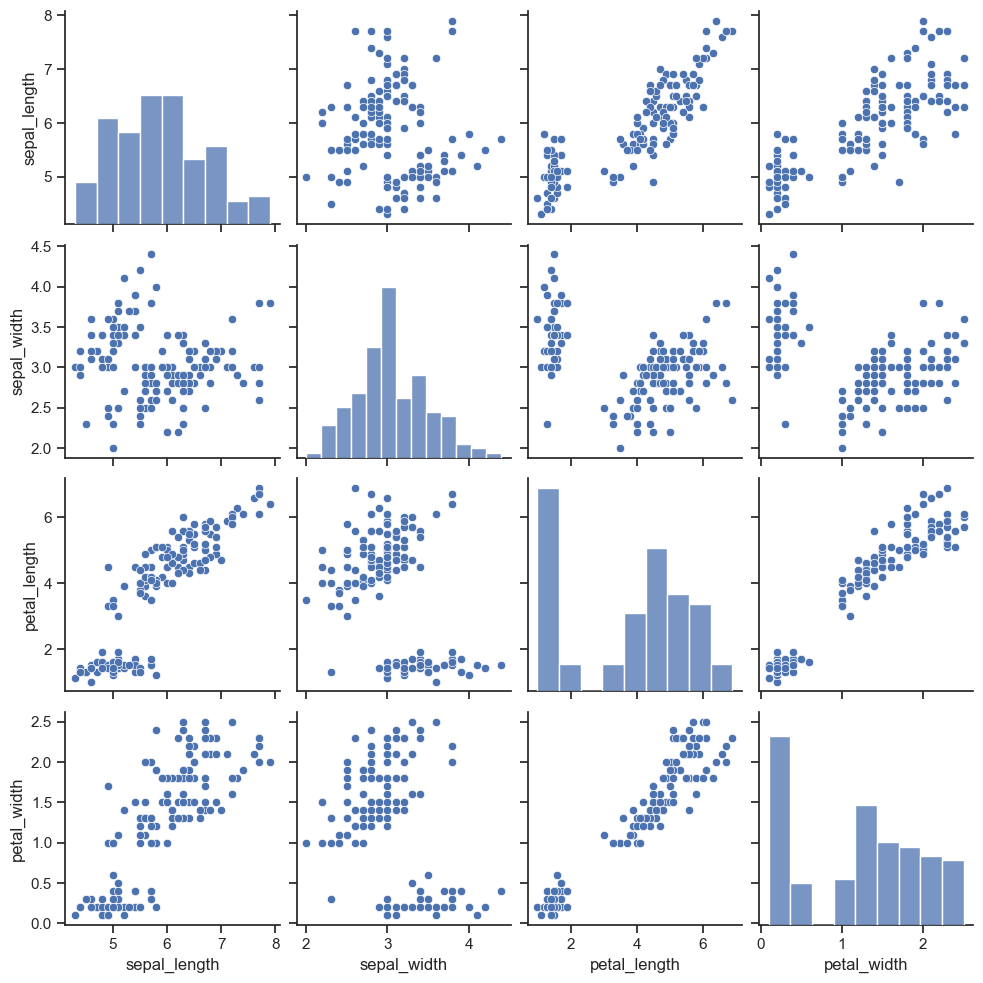

In [58]:
# Pairplots are a good example

import seaborn as sns

sns.set(style="ticks", color_codes=True)

iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

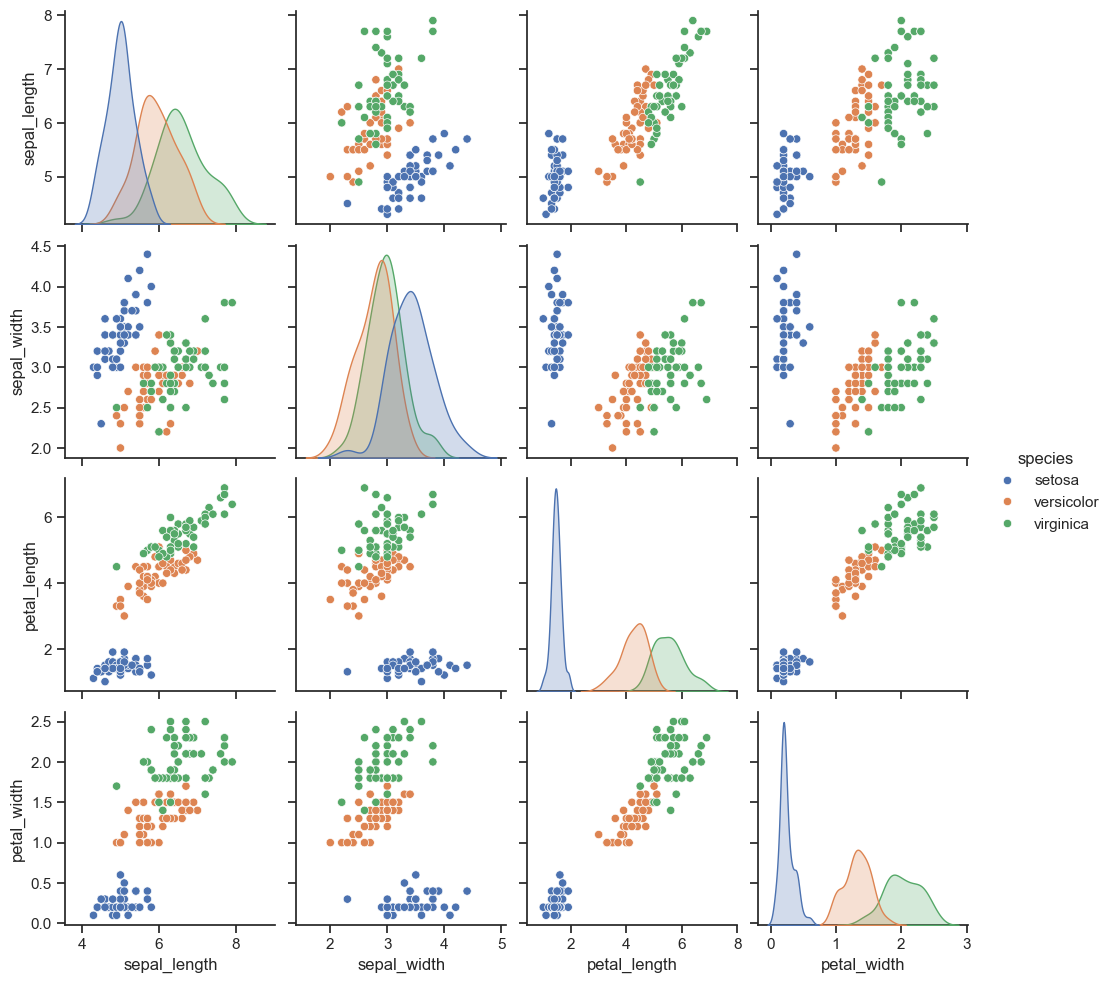

In [59]:
# Some more pairplot extensions:  https://seaborn.pydata.org/generated/seaborn.pairplot.html

g = sns.pairplot(iris, hue="species")

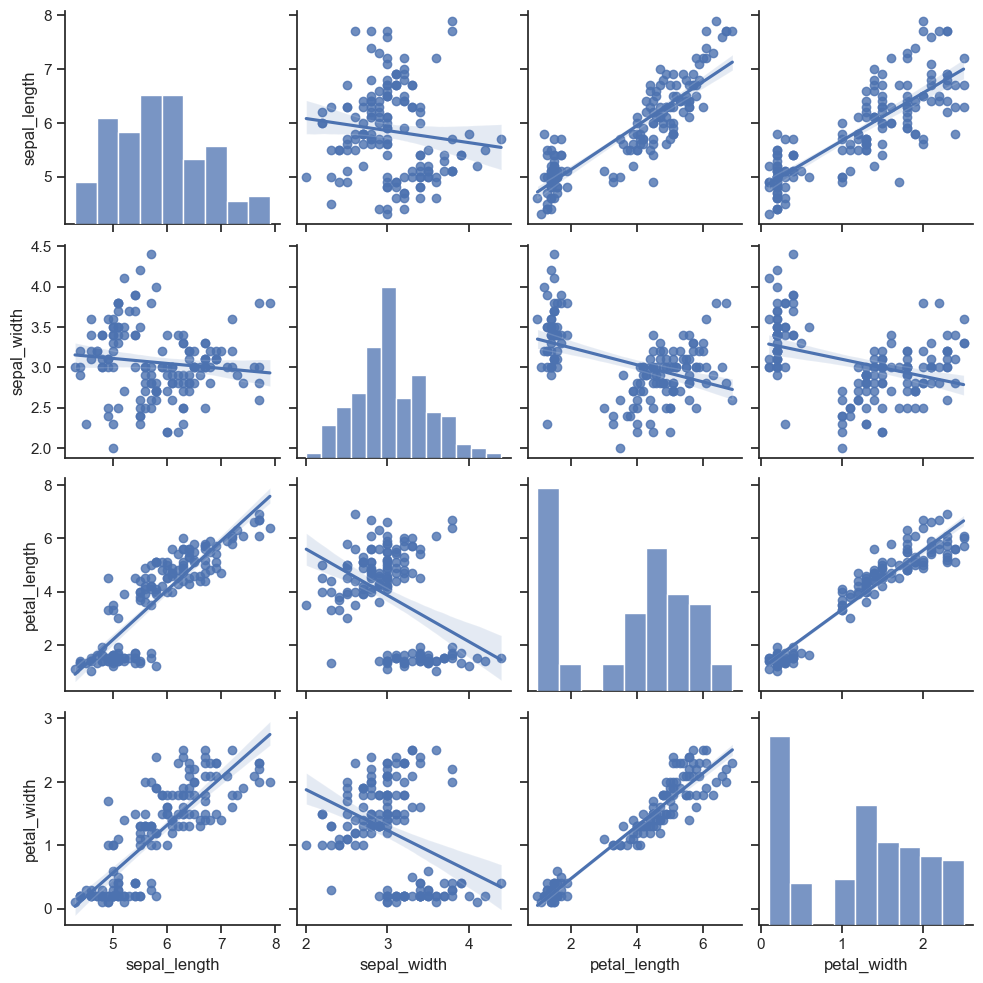

In [60]:
# Add regression lines

g = sns.pairplot(iris, kind="reg")